In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from model import demonstrate

#demonstrate()

In [3]:
import numpy as np
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn

In [4]:
# PARAMETERS:
n = 25
input_size = 2
hidden_size = 1
num_classes = 2
num_epochs = 10
batch_size = 1
learning_rate = 0.001

In [5]:
from load_linearData import getLinearDataLoader
from LinearModel import run_model

train_data, test_data, train, test = \
    getLinearDataLoader(n=n, d=num_classes, sigma = 0.15, test_split = 0.2, batch_size = 1, num_workers = 1)
    
run_model(input_size = input_size,hidden_size=hidden_size, num_classes=num_classes, num_epochs=num_epochs,
    batch_size=batch_size, learning_rate=learning_rate, n=n,
    train_loader=train,
    test_loader=test)

Epoch [1/10], Step [20/40], Loss: 0.7788
Epoch [1/10], Step [40/40], Loss: 0.6420
Epoch [2/10], Step [20/40], Loss: 0.6377
Epoch [2/10], Step [40/40], Loss: 0.7447
Epoch [3/10], Step [20/40], Loss: 0.7424
Epoch [3/10], Step [40/40], Loss: 0.7289
Epoch [4/10], Step [20/40], Loss: 0.6391
Epoch [4/10], Step [40/40], Loss: 0.6327
Epoch [5/10], Step [20/40], Loss: 0.6280
Epoch [5/10], Step [40/40], Loss: 0.6051
Epoch [6/10], Step [20/40], Loss: 0.6295
Epoch [6/10], Step [40/40], Loss: 0.7041
Epoch [7/10], Step [20/40], Loss: 0.5987
Epoch [7/10], Step [40/40], Loss: 0.6982
Epoch [8/10], Step [20/40], Loss: 0.6807
Epoch [8/10], Step [40/40], Loss: 0.6590
Epoch [9/10], Step [20/40], Loss: 0.6944
Epoch [9/10], Step [40/40], Loss: 0.6475
Epoch [10/10], Step [20/40], Loss: 0.5601
Epoch [10/10], Step [40/40], Loss: 0.5543
Accuracy of the network on linearly separable data: 100.0 %
OrderedDict([('fc1.weight', tensor([[0.1889, 0.4189]], device='cuda:0')), ('fc1.bias', tensor([-0.5950], device='cuda:

In [6]:
from LinearModel import LinearNet
#load the model back
#torch.load_state_dict('model.ckpt', LinearNet(2,2,2))
model = LinearNet(input_size, hidden_size, num_classes)
state_dict = torch.load('model.ckpt')
model.load_state_dict(state_dict)

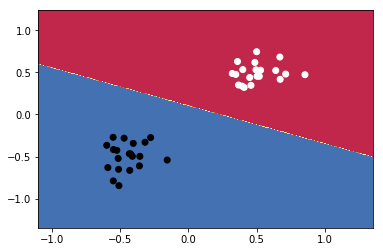

In [7]:
%matplotlib inline
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
plot_decision_boundary(model.predict, train_data.inputs, train_data.labels)